# Notebook

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

## ETL

### Extract

In [59]:
# Data extraction.
data = fetch_california_housing()

df = pd.DataFrame(data=data['data'], columns=data['feature_names'])
df['Price'] = data['target']

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [66]:
df['HouseAge'].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: HouseAge, dtype: float64

<AxesSubplot:xlabel='HouseAge', ylabel='Count'>

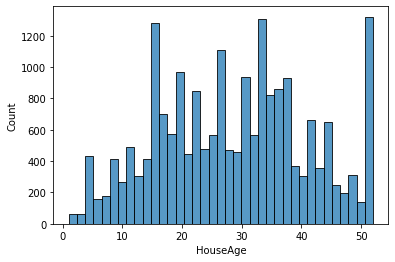

In [67]:
sns.histplot(df['HouseAge'])

### Transform

In [73]:
# Which columns have exceding large difference between max and min?
display(df.describe().round())

threshold = 10.0
list_large_diff = []

for i in df.columns:
    if np.abs(df[i].max()) - np.abs(df[i].min()) > threshold:
        list_large_diff.append(i)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0
mean,4.0,29.0,5.0,1.0,1425.0,3.0,36.0,-120.0,2.0
std,2.0,13.0,2.0,0.0,1132.0,10.0,2.0,2.0,1.0
min,0.0,1.0,1.0,0.0,3.0,1.0,33.0,-124.0,0.0
25%,3.0,18.0,4.0,1.0,787.0,2.0,34.0,-122.0,1.0
50%,4.0,29.0,5.0,1.0,1166.0,3.0,34.0,-118.0,2.0
75%,5.0,37.0,6.0,1.0,1725.0,3.0,38.0,-118.0,3.0
max,15.0,52.0,142.0,34.0,35682.0,1243.0,42.0,-114.0,5.0


<AxesSubplot:xlabel='HouseAge', ylabel='Count'>

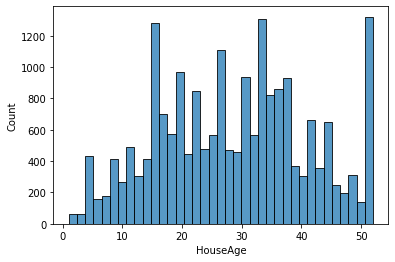

In [74]:
# HouseAge seems faily distributed...
sns.histplot(df['HouseAge'])

In [75]:
list_large_diff.remove('HouseAge')
print(list_large_diff)

['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


How to deal with the scalling?

Almost all variables have a relevant difference between the max and min values. One way to deal with it is to establish a top value (i.e. truncate). In this exercise the top value will be the 90 percentile.

obs: Latitude, Longitude and HouseAge will not be submitted to such treatment.

In [76]:
# Excluding the 

# Establishing the top-value
for i in list_large_diff:
    df[i] = np.where(df[i] > np.percentile(df[i], 90), np.percentile(df[i], 90), df[i])

df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.690608,28.639486,5.226731,1.052095,1293.456977,2.857335,35.631861,-119.569704,2.068558
std,1.430461,12.585558,1.098748,0.073290,674.438373,0.607750,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,6.159210,52.000000,6.961188,1.172727,2566.000000,3.885273,41.950000,-114.310000,5.000010


In [77]:
# Separating the data
X = df.drop(columns='Price')
y = df['Price']

# Applying scalling.
X = MinMaxScaler().fit_transform(X)

In [78]:
# Applying scalling.
X = MinMaxScaler().fit_transform(X)

## PCA

<AxesSubplot:>

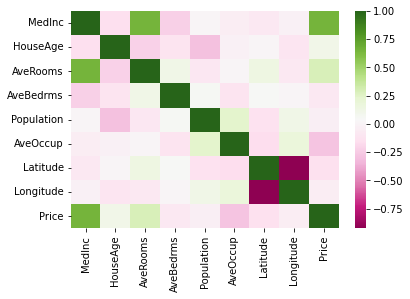

In [81]:
sns.heatmap(df.corr(), cmap="PiYG")

What to expect?

- `MedInc` and `AveRooms` seemns to be strongly correlated, therefore it is expected both will heavily compose a Principal Component (PC). Similary, `Latitude` and `Longitude` are obviously correlated. 
- `Population` and `HouseAge` seem to be moderately correlated.
- `AveOccup` appears to to be lacking in correlation with other variables, for which it is expected a single PC composed exclusively by `AveOccup`.

### Sklearn implementation

In [150]:
# PCA in action.
pca = PCA(n_components=2, random_state=52).fit(X)
display(pca.explained_variance_ratio_)

X_pca_sklearn = pca.transform(X)
X_pca_sklearn

array([0.27968286, 0.24331221])

array([[ 0.47126761, -0.49013236],
       [-0.07859017, -0.60245831],
       [ 0.50114997, -0.40388562],
       ...,
       [ 0.36046639, -0.0106948 ],
       [ 0.43424345, -0.03933915],
       [ 0.23077162, -0.0978723 ]])

<AxesSubplot:>

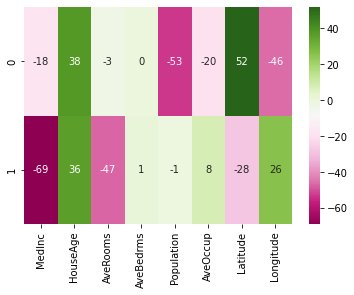

In [156]:
# Analysing how much the variables contributed to each Principal Component.
x_labels = df.drop(columns='Price').columns
sns.heatmap((pca.components_ * 100).astype(int),
            annot=True,
            cmap="PiYG",
            xticklabels=x_labels)

Results

Based on 3 Principal Components, the expected results turned into reality: 
- PC 0: `Latitude` and `Longitude` 
- PC 1: `MedInc` and `AveRooms`

In other hand, the relevant position of `Population` in PC 0 and `HouseAge` in PC 1 were not expected.



### Manual implementation

In [159]:
# It is easier to work with a dataframe that a multilevel array.
df_X = pd.DataFrame(X)
df_X.columns = x_labels

df_X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.000000,0.784314,1.000000,0.822589,0.124464,0.583548,0.567481,0.211155
1,1.000000,0.392157,0.881759,0.760724,0.935622,0.443955,0.565356,0.212151
2,1.000000,1.000000,1.000000,0.881723,0.192353,0.660813,0.564293,0.210159
3,0.908803,1.000000,0.812947,0.881262,0.216543,0.581164,0.564293,0.209163
4,0.591291,1.000000,0.888908,0.890819,0.219274,0.466388,0.564293,0.209163


In [164]:
 * (df_X - df_X.mean())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.872404,0.484726,0.567276,-0.067395,-0.758062,-0.189028,0.477819,-0.529939
1,0.872404,-0.299588,0.330793,-0.191125,0.864255,-0.468213,0.473568,-0.527947
2,0.872404,0.916099,0.567276,0.050873,-0.622284,-0.034498,0.471443,-0.531931
3,0.690011,0.916099,0.193170,0.049951,-0.573903,-0.193795,0.471443,-0.533923
4,0.054986,0.916099,0.345091,0.069064,-0.568441,-0.423348,0.471443,-0.533923
...,...,...,...,...,...,...,...,...
20635,-0.752851,-0.142725,-0.059289,0.193564,-0.349947,-0.185864,0.817883,-0.302848
20636,-0.400688,-0.417235,0.290204,0.287427,-0.731531,0.166285,0.820008,-0.326752
20637,-0.703481,-0.456450,-0.006930,0.162016,-0.223533,-0.333045,0.807256,-0.328744
20638,-0.644392,-0.417235,0.033616,0.285503,-0.431102,-0.459840,0.807256,-0.348664
